# Creating the dataset from:
    - donateacry-corpus: https://github.com/gveres/donateacry-corpus/
    - ESC-50: https://github.com/karolpiczak/ESC-50

## need to eliminate the baby crying from the negatives

In [1]:
# !pip install matplotlib
# !pip install librosa

# donateacry cleaning and testing

In [87]:
import os
import IPython.display as ipd

import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import matplotlib.pyplot as plt
import pandas as pd  
import librosa as lb 
import librosa.display 
import wave

%matplotlib inline

In [88]:
cry_data_path = "./data/donateacry_cleaned"
cry_categories = os.listdir(cry_data_path)
cry_categories = [cat for cat in cry_categories if cat != 'README.md']
cry_categories

['discomfort', 'tired', 'belly_pain', 'burping', 'hungry']

In [89]:
cry_testing_file = cry_data_path + "/" + cry_categories[0] + "/" + os.listdir(cry_data_path + "/" + cry_categories[0])[0]
cry_testing_file

'./data/donateacry_cleaned/discomfort/10A40438-09AA-4A21-83B4-8119F03F7A11-1430925142-1.0-f-26-dc.wav'

In [90]:

ipd.Audio(cry_testing_file)

In [91]:
sample_rate, audio = wavfile.read(cry_testing_file)
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 8000Hz
Audio duration: 7.0s


In [92]:
with wave.open(cry_testing_file, 'rb') as wf:
    print(wf.getnchannels())
    print(wf.getframerate())


1
8000


## go through the directory and put all files in one dataframe

In [99]:
# cries = pd.DataFrame(columns = ['filename', 'category'])
cries_list = np.array([[fname,category] for category in cry_categories for fname in os.listdir(cry_data_path + "/" + category)]) 
cries = pd.DataFrame(cries_list, columns = ['filename', 'classification'])

In [100]:
cries.head()

filename classification
0  10A40438-09AA-4A21-83B4-8119F03F7A11-143092514...     discomfort
1  d6cda191-4962-4308-9a36-46d5648a95ed-143108626...     discomfort
2  7b0e160e-0505-459e-8ecb-304d7afae9d2-143748697...     discomfort
3  1309B82C-F146-46F0-A723-45345AFA6EA8-143280169...     discomfort
4  999bf14b-e417-4b44-b746-9253f81efe38-143084501...     discomfort

In [95]:
print(set(cries['classification']))

{'tired', 'hungry', 'burping', 'belly_pain', 'discomfort'}


# ESC50 cleaning

In [96]:
esccsv = "./data/esc_50/meta/esc50.csv" 
escmeta = pd.read_csv(esccsv) 
# metadata.head()
clean_esc50 = escmeta[escmeta['category'] != "crying_baby"]
clean_esc50.head()

filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A

## put esc50 common format (filename | classification)

In [97]:
esc50_formatted = clean_esc50.filter(['filename'],axis=1)
esc50_formatted.insert(1,'classification','negative')
esc50_formatted.head()

filename classification
0   1-100032-A-0.wav       negative
1  1-100038-A-14.wav       negative
2  1-100210-A-36.wav       negative
3  1-100210-B-36.wav       negative
4  1-101296-A-19.wav       negative

In [98]:
print(esc50_formatted)

               filename classification
0      1-100032-A-0.wav       negative
1     1-100038-A-14.wav       negative
2     1-100210-A-36.wav       negative
3     1-100210-B-36.wav       negative
4     1-101296-A-19.wav       negative
...                 ...            ...
1995   5-263831-B-6.wav       negative
1996  5-263902-A-36.wav       negative
1997   5-51149-A-25.wav       negative
1998    5-61635-A-8.wav       negative
1999     5-9032-A-0.wav       negative

[1960 rows x 2 columns]


In [62]:
esc_audio_path = "./data/esc_50/audio"
esctestfile = esc50_formatted['filename'][0]

In [63]:
with wave.open(esc_audio_path + "/" + esctestfile, 'rb') as wf:
    print(wf.getnchannels())
    print(wf.getframerate())


1
44100


# Upsampling

In [101]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import resample

def upsample_wav(src_path, dst_path, new_rate):
    # Read the wav file
    original_rate, data = wavfile.read(src_path)

    # Check if the wav file is stereo (2 channels) or mono (1 channel)
    if len(data.shape) == 2:
        # For stereo
        channels = data.shape[1]
        # We need to resample each channel separately
        new_data = np.zeros((int(len(data) * new_rate / original_rate), channels))
        for i in range(channels):
            new_data[:, i] = resample(data[:, i], int(len(data[:, i]) * new_rate / original_rate))
    else:
        # For mono
        new_data = resample(data, int(len(data) * new_rate / original_rate))

    # Write the upsampled file
    wavfile.write(dst_path, new_rate, new_data.astype(np.int16))

In [107]:
cry_paths = [cry_data_path + "/" + category + "/" + fname for category in cry_categories for fname in os.listdir(cry_data_path + "/" + category)]
# orig_cries = pd.DataFrame(cries_list, columns = ['filename', 'classification'])

In [108]:
print(cry_paths)

['./data/donateacry_cleaned/discomfort/10A40438-09AA-4A21-83B4-8119F03F7A11-1430925142-1.0-f-26-dc.wav', './data/donateacry_cleaned/discomfort/d6cda191-4962-4308-9a36-46d5648a95ed-1431086262776-1.7-m-04-ch.wav', './data/donateacry_cleaned/discomfort/7b0e160e-0505-459e-8ecb-304d7afae9d2-1437486974312-1.7-m-04-dc.wav', './data/donateacry_cleaned/discomfort/1309B82C-F146-46F0-A723-45345AFA6EA8-1432801693-1.1-f-26-dc.wav', './data/donateacry_cleaned/discomfort/999bf14b-e417-4b44-b746-9253f81efe38-1430845018393-1.7-m-26-ch.wav', './data/donateacry_cleaned/discomfort/79FF400A-97E2-4701-987D-C7C850D5523C-1430089688-1.0-f-48-dc.wav', './data/donateacry_cleaned/discomfort/D1CB71F9-EF76-49B3-A703-41D557444D21-1436863419-1.1-f-26-dc.wav', './data/donateacry_cleaned/discomfort/ae5a462b-5424-4b5b-82d5-07ccb61654ab-1431064345173-1.7-f-48-dc.wav', './data/donateacry_cleaned/discomfort/1309B82C-F146-46F0-A723-45345AFA6EA8-1430704008-1.0-f-48-dc.wav', './data/donateacry_cleaned/discomfort/2294E2B2-8E36

In [110]:
for i, cry in enumerate(cry_paths):
    upsample_wav(cry, cry, 44100)

## MFCCs

In [64]:
def loadfile(fname):
    with wave.open(fname, 'rb') as wf:
        # print(wf.getnchannels())
        # print(wf.getframerate())
        # print(wf.getparams())
        frames = wf.readframes(wf.getnframes())
        # print(len(frames))
        # print(frames)
        audio_data = frames
        audio_array = np.frombuffer(audio_data, dtype=np.int16)
        return audio_array
        
def extract_mfccs(audio_file_path):
    n_mfcc = 10
    audio_array = loadfile(audio_file_path)
    mfccs = librosa.feature.mfcc(y=audio_array.astype('float32'), 
                              sr=8000, n_mfcc=10,dtype=np.float32)
    # y, sr = librosa.load(audio_file_path)
    # mfccs = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=n_mfcc)
    return mfccs.mean(axis=1) 

## cries

In [65]:
# List of audio file paths
cry_data_path = "./data/donateacry_cleaned"
cry_audio_files = np.array([f"{cry_data_path}/{category}/{fname}" for category in cry_categories for fname in os.listdir(cry_data_path + "/" + category)]) 

# Initialize an empty list to store the MFCC vectors
cry_mfcc_vectors = []

# Extract MFCC vectors for each audio file and store them in the list
for audio_file_path in cry_audio_files:
    mfcc_vector = extract_mfccs(audio_file_path)
    cry_mfcc_vectors.append(mfcc_vector)

In [66]:
n_mfcc = 10
cries_mfcc_df = pd.DataFrame(data=cry_mfcc_vectors, columns=[f'MFCC_{i}' for i in range(1, n_mfcc + 1)])

cries_mfcc_df.head()


MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
0  929.014832   19.822575 -47.350857 -30.245201 -21.855499  -8.129131   
1  813.088928  -28.164577 -59.126396 -10.630727 -19.886158  18.044292   
2  799.248718  106.592682  -2.445993   7.357971 -19.878782   2.573098   
3  890.449951   21.205910 -34.534603 -33.751324 -33.044239   5.839946   
4  660.755615  101.454803 -54.192043  11.089276  -4.415250 -16.562540   

      MFCC_7     MFCC_8     MFCC_9    MFCC_10  
0 -14.099008  -8.989732 -17.492725  -0.152560  
1 -23.957348  13.951138 -15.480292 -11.093403  
2 -10.899929  11.729693 -12.498252   3.451674  
3 -20.564890  -2.141417 -11.258945  -2.273828  
4  -9.532226   3.105078  -5.860729 -10.071422

In [67]:
print(cries_mfcc_df.size)
print(len(cry_audio_files))

4570
457


## negatives

In [68]:
esc50_formatted.to_csv('intermediate.csv', index=False)
esc50_formatted = pd.read_csv('intermediate.csv')

In [69]:
# List of audio file paths
neg_data_path = "./data/esc_50/audio"
neg_audio_files = np.array([f"{neg_data_path}/{fname}" for fname in esc50_formatted['filename']]) 

# Initialize an empty list to store the MFCC vectors
neg_mfcc_vectors = []

# Extract MFCC vectors for each audio file and store them in the list
for audio_file_path in neg_audio_files:
    mfcc_vector = extract_mfccs(audio_file_path)
    neg_mfcc_vectors.append(mfcc_vector)

In [70]:
n_mfcc = 10
neg_mfcc_df = pd.DataFrame(data=neg_mfcc_vectors, columns=[f'MFCC_{i}' for i in range(1, n_mfcc + 1)])

neg_mfcc_df.tail()

MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
1955  729.234131  161.647766  30.756815  24.977142  -1.410881  -1.191111   
1956  942.969604  149.435165 -98.246445  90.575569 -48.954140  50.591267   
1957  702.595398   86.047966   7.688797  25.062363   9.981625  10.810649   
1958  832.148071  132.961914   4.196231  51.854862 -37.962681  22.720526   
1959  580.375427   44.388229  -6.017336  -7.052705  -6.423955  -2.268004   

         MFCC_7     MFCC_8     MFCC_9    MFCC_10  
1955   1.976924  -2.026938   1.675846  -2.088073  
1956 -19.221737   5.035063  13.747256 -21.982349  
1957   5.836665   8.459169   4.857493   5.734694  
1958  -8.419871  14.072458 -15.192708  -5.295647  
1959   0.653581  -3.871778  -3.290145  -2.417947

In [71]:
print(len(esc50_formatted))
print(len(neg_mfcc_df))

1960
1960


In [72]:
print(esc50_formatted)

               filename classification
0      1-100032-A-0.wav       negative
1     1-100038-A-14.wav       negative
2     1-100210-A-36.wav       negative
3     1-100210-B-36.wav       negative
4     1-101296-A-19.wav       negative
...                 ...            ...
1955   5-263831-B-6.wav       negative
1956  5-263902-A-36.wav       negative
1957   5-51149-A-25.wav       negative
1958    5-61635-A-8.wav       negative
1959     5-9032-A-0.wav       negative

[1960 rows x 2 columns]


In [73]:
neg_dataset = pd.concat([esc50_formatted,neg_mfcc_df],axis=1)

In [110]:
neg_dataset.tail()

filename classification      MFCC_1      MFCC_2     MFCC_3  \
1955   5-263831-B-6.wav       negative  729.234131  161.647766  30.756815   
1956  5-263902-A-36.wav       negative  942.969604  149.435165 -98.246445   
1957   5-51149-A-25.wav       negative  702.595398   86.047966   7.688797   
1958    5-61635-A-8.wav       negative  832.148071  132.961914   4.196231   
1959     5-9032-A-0.wav       negative  580.375427   44.388229  -6.017336   

         MFCC_4     MFCC_5     MFCC_6     MFCC_7     MFCC_8     MFCC_9  \
1955  24.977142  -1.410881  -1.191111   1.976924  -2.026938   1.675846   
1956  90.575569 -48.954140  50.591267 -19.221737   5.035063  13.747256   
1957  25.062363   9.981625  10.810649   5.836665   8.459169   4.857493   
1958  51.854862 -37.962681  22.720526  -8.419871  14.072458 -15.192708   
1959  -7.052705  -6.423955  -2.268004   0.653581  -3.871778  -3.290145   

        MFCC_10  
1955  -2.088073  
1956 -21.982349  
1957   5.734694  
1958  -5.295647  
1959  -2.417947

# Concatenate dataframes

## Cries classification

In [74]:
cries_dataset = pd.concat([cries,cries_mfcc_df], axis=1)
cries_dataset.head()

filename classification  \
0  10A40438-09AA-4A21-83B4-8119F03F7A11-143092514...     discomfort   
1  d6cda191-4962-4308-9a36-46d5648a95ed-143108626...     discomfort   
2  7b0e160e-0505-459e-8ecb-304d7afae9d2-143748697...     discomfort   
3  1309B82C-F146-46F0-A723-45345AFA6EA8-143280169...     discomfort   
4  999bf14b-e417-4b44-b746-9253f81efe38-143084501...     discomfort   

       MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
0  929.014832   19.822575 -47.350857 -30.245201 -21.855499  -8.129131   
1  813.088928  -28.164577 -59.126396 -10.630727 -19.886158  18.044292   
2  799.248718  106.592682  -2.445993   7.357971 -19.878782   2.573098   
3  890.449951   21.205910 -34.534603 -33.751324 -33.044239   5.839946   
4  660.755615  101.454803 -54.192043  11.089276  -4.415250 -16.562540   

      MFCC_7     MFCC_8     MFCC_9    MFCC_10  
0 -14.099008  -8.989732 -17.492725  -0.152560  
1 -23.957348  13.951138 -15.480292 -11.093403  
2 -10.899929  11.729693 -12.498252   3.451674  
3 -20.564890  -2.141417 -11.258945  -2.273828  
4  -9.532226   3.105078  -5.860729 -10.071422

In [75]:
cries_dataset.to_csv('cries_classification.csv', index=False)

## Cry detection

In [76]:
neg_dataset = pd.concat([esc50_formatted,neg_mfcc_df],axis=1)
pos_dataset = cries_dataset.assign(classification='positive')

pos_dataset.head()

filename classification  \
0  10A40438-09AA-4A21-83B4-8119F03F7A11-143092514...       positive   
1  d6cda191-4962-4308-9a36-46d5648a95ed-143108626...       positive   
2  7b0e160e-0505-459e-8ecb-304d7afae9d2-143748697...       positive   
3  1309B82C-F146-46F0-A723-45345AFA6EA8-143280169...       positive   
4  999bf14b-e417-4b44-b746-9253f81efe38-143084501...       positive   

       MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
0  929.014832   19.822575 -47.350857 -30.245201 -21.855499  -8.129131   
1  813.088928  -28.164577 -59.126396 -10.630727 -19.886158  18.044292   
2  799.248718  106.592682  -2.445993   7.357971 -19.878782   2.573098   
3  890.449951   21.205910 -34.534603 -33.751324 -33.044239   5.839946   
4  660.755615  101.454803 -54.192043  11.089276  -4.415250 -16.562540   

      MFCC_7     MFCC_8     MFCC_9    MFCC_10  
0 -14.099008  -8.989732 -17.492725  -0.152560  
1 -23.957348  13.951138 -15.480292 -11.093403  
2 -10.899929  11.729693 -12.498252   3.451674  
3 -20.564890  -2.141417 -11.258945  -2.273828  
4  -9.532226   3.105078  -5.860729 -10.071422

In [77]:
cry_esc50 = escmeta[escmeta['category'] == "crying_baby"].filter(['filename'],axis=1)
cry_esc50.insert(1,'classification','positive')
# List of audio file paths
cry_esc50_data_path = "./data/esc_50/audio"
cry_esc50_audio_files = np.array([f"{cry_esc50_data_path}/{fname}" for fname in cry_esc50['filename']]) 

# Initialize an empty list to store the MFCC vectors
cry_esc50_mfcc_vectors = []

# Extract MFCC vectors for each audio file and store them in the list
for audio_file_path in cry_esc50_audio_files:
    mfcc_vector = extract_mfccs(audio_file_path)
    cry_esc50_mfcc_vectors.append(mfcc_vector)
cry_esc50.head()


filename classification
78   1-187207-A-20.wav       positive
104  1-211527-A-20.wav       positive
105  1-211527-B-20.wav       positive
106  1-211527-C-20.wav       positive
113   1-22694-A-20.wav       positive

In [78]:
n_mfcc = 10
cry_esc50_mfcc_df = pd.DataFrame(data=cry_esc50_mfcc_vectors, columns=[f'MFCC_{i}' for i in range(1, n_mfcc + 1)])
cry_esc50_mfcc_df.tail()

MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
35  689.889160  125.863586  11.108025  39.022320  14.449718  30.648956   
36  780.489563  154.737137 -28.669971  35.989143 -20.365274  25.542942   
37  794.611511  142.312988 -16.243433  23.894690 -14.825190  52.321228   
38  761.342834  111.871239 -21.735582  14.778297 -33.277451  -4.075656   
39  680.516541  119.024887   4.131144  18.288029   4.764928  32.319233   

       MFCC_7     MFCC_8    MFCC_9    MFCC_10  
35  22.064974  -4.134403 -4.398698  11.472240  
36   3.135467 -18.155951  0.808353  15.603189  
37  22.520279 -16.060499 -0.687089  26.908520  
38 -11.184600 -20.953688 -7.059661  -0.779217  
39  25.278944 -16.584526  0.330686  17.421310

In [79]:
cry_esc50.to_csv('intermediate.csv', index=False)
cry_esc50 = pd.read_csv('intermediate.csv')

In [80]:
esc_50_cry_dataset = pd.concat([cry_esc50,cry_esc50_mfcc_df],axis=1)
esc_50_cry_dataset.head()

filename classification      MFCC_1      MFCC_2     MFCC_3  \
0  1-187207-A-20.wav       positive  690.631409  113.396683  30.656939   
1  1-211527-A-20.wav       positive  722.262451  132.625259 -37.642139   
2  1-211527-B-20.wav       positive  770.900696  151.935028  -3.661144   
3  1-211527-C-20.wav       positive  776.925293  119.331398 -36.189011   
4   1-22694-A-20.wav       positive  709.389526  113.438286 -17.843252   

      MFCC_4     MFCC_5     MFCC_6     MFCC_7    MFCC_8    MFCC_9   MFCC_10  
0  21.986788   6.053794  24.832819  15.464185  3.388590  5.690349 -4.603798  
1  12.870442 -31.644590  -6.914686  10.029215 -6.956368 -5.158285  3.318949  
2  15.550607 -18.784115  15.267089   2.345166 -1.774234  4.837403 -7.894366  
3  15.436405 -39.334850  -5.418937   9.619451 -1.349590 -5.900626 -6.872179  
4  34.788010  -1.095486   0.262208  -7.530364 -6.626737  7.103665 -5.833982

In [81]:
detection_dataset = pd.concat([neg_dataset,pos_dataset,esc_50_cry_dataset])

In [82]:
detection_dataset.head()

filename classification       MFCC_1      MFCC_2     MFCC_3  \
0   1-100032-A-0.wav       negative   494.830841   10.294344   1.111452   
1  1-100038-A-14.wav       negative   803.808167  155.104919 -60.574547   
2  1-100210-A-36.wav       negative  1013.069580  123.483681 -36.936245   
3  1-100210-B-36.wav       negative  1010.730286  127.907745 -42.541599   
4  1-101296-A-19.wav       negative   556.475464  113.051788   3.755488   

      MFCC_4     MFCC_5     MFCC_6     MFCC_7     MFCC_8     MFCC_9    MFCC_10  
0   2.627594  -1.697798  -2.135711  -1.150459  -1.397518  -1.624161  -0.958297  
1   6.048802  -9.613963  -8.536694  -7.695093  -3.446557  15.709990   3.629604  
2  35.574203 -19.142288  34.406319 -10.934359  24.084787 -29.679832  11.153445  
3  42.149696 -21.280687  32.851433  -9.566648  20.871023 -25.734701   9.449923  
4  41.497749  16.722778  36.695667   8.586819  21.837311   2.769912  10.127470

In [116]:
detection_dataset.tail()

filename classification  \
452  8f5c01dc-6826-4076-a831-027ad61afdaf-143587350...       positive   
453  40a4c760-facf-4911-b0a6-22eccc3ab18d-143047771...       positive   
454  F24DE44B-762C-4149-AC92-96A5E57ED118-143081693...       positive   
455  9aa8bac5-eeb9-4f19-a4bf-7c439e87364b-143074538...       positive   
456  aaa57dbd-7b88-454a-963e-6faa2f4ed4e7-143691022...       positive   

         MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
452  801.491943 -28.927538 -46.037895  -8.618154 -10.506639 -15.690027   
453  990.827820 -27.010868   7.823496  -9.228694 -11.188974  -1.651927   
454  795.529602  32.426613 -17.285643 -21.758980 -35.890095 -25.757706   
455  767.303101  30.718958 -37.727489 -16.558054 -42.972973  18.793978   
456  561.621826  23.139704   1.073212   7.567330  -0.572748  -2.562028   

        MFCC_7     MFCC_8     MFCC_9    MFCC_10  
452   0.223281  -4.746837  -4.736784   5.391144  
453  -9.149456 -16.174717 -13.439293  -3.966693  
454  -7.051079 -20.294167  -8.809352   4.736472  
455  -9.468043 -19.045712 -10.654701 -13.975971  
456 -13.519232  -5.332527  -4.828667  -0.546336

In [83]:
detection_dataset.to_csv('cry_detection.csv', index=False)

## cries visualization

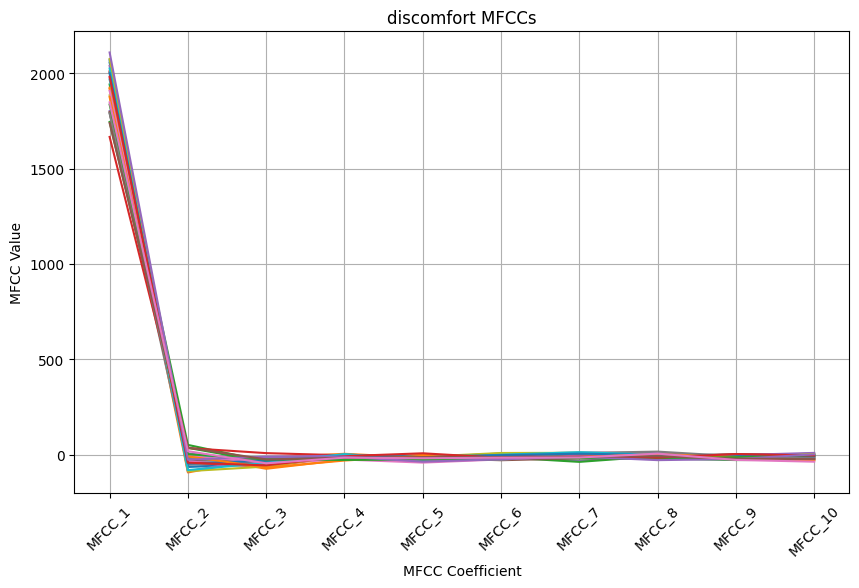

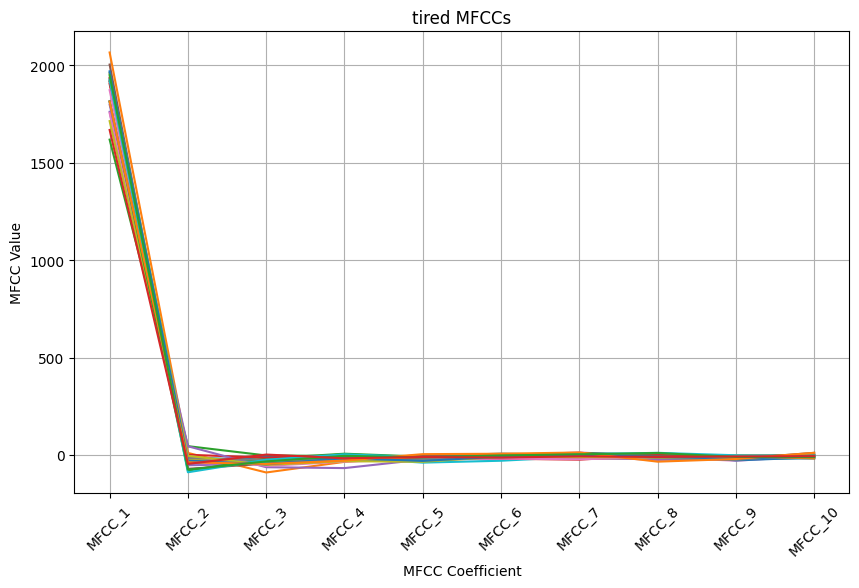

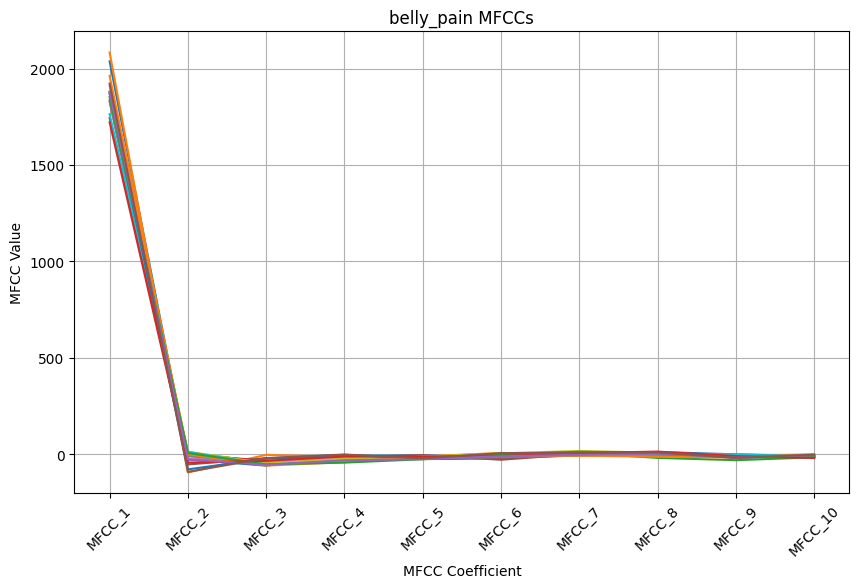

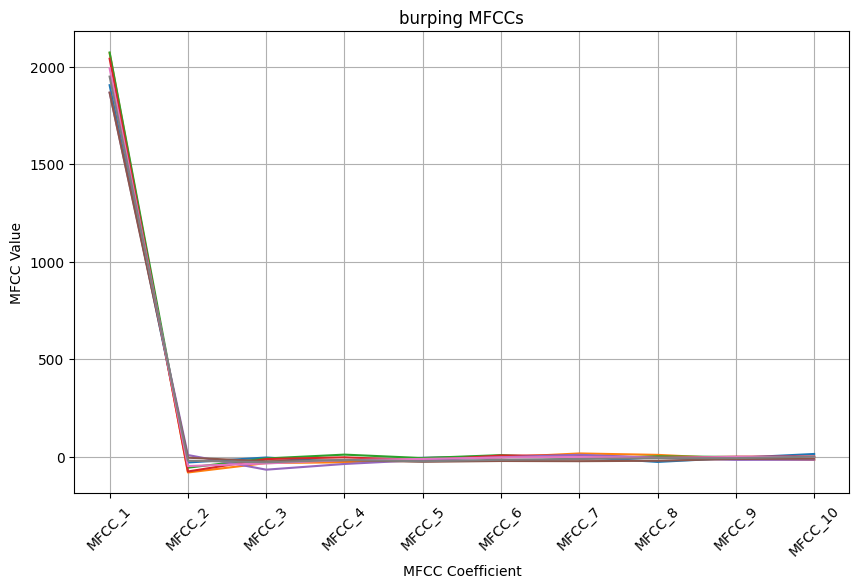

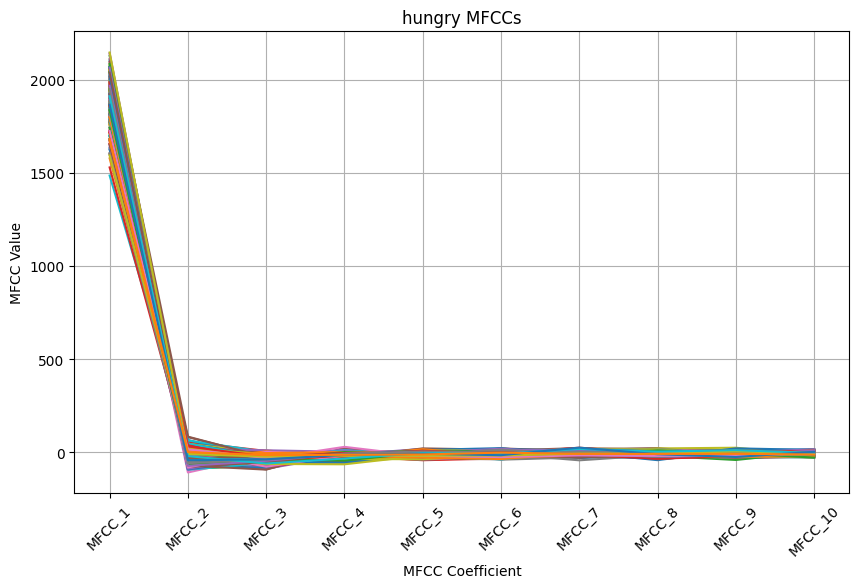

In [130]:
for i, category in enumerate(cry_categories):
    category_cries = cries_dataset.loc[cries_dataset['classification'] == category]
    plt.figure(figsize=(10, 6))
    for index, row in category_cries.iterrows():
        plt.plot(category_cries.columns[2:], row[2:], label=row['filename'])  # Assuming 'Filename' is the column with filenames

    plt.xlabel('MFCC Coefficient')
    plt.ylabel('MFCC Value')
    plt.title(f"{category} MFCCs")
    # plt.legend()
    plt.grid()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


# Stich cries and random noise for testing

Dont use the cries in the esc50 dataset because the added noise sets it firmly in the negative identification

In [77]:
esccsvPath = "./data/esc_50/meta/esc50.csv" 
escmeta = pd.read_csv(esccsvPath) 
rando_esc50 = escmeta[escmeta['category'] != "crying_baby"].sample(3)
rando_esc50.head()

filename  fold  target        category  esc10  src_file take
1837  5-218196-B-27.wav     5      27  brushing_teeth  False    218196    B
1852  5-220955-A-40.wav     5      40      helicopter   True    220955    A
611   2-209474-A-25.wav     2      25       footsteps  False    209474    A

In [78]:
test_audio_df = rando_esc50

In [79]:
test_audio_df

filename  fold  target        category  esc10  src_file take
1837  5-218196-B-27.wav     5      27  brushing_teeth  False    218196    B
1852  5-220955-A-40.wav     5      40      helicopter   True    220955    A
611   2-209474-A-25.wav     2      25       footsteps  False    209474    A

In [80]:
escfiles = np.array(test_audio_df['filename'])
print(escfiles)

['5-218196-B-27.wav' '5-220955-A-40.wav' '2-209474-A-25.wav']


In [81]:
escfilepath = "./data/esc_50/audio"

In [82]:
files = []
for infile in escfiles:
    files.append(f"{escfilepath}/{infile}")

In [83]:
import wave

outfile = "./data/test/escsounds.wav"

data = []
for infile in files:
    w = wave.open(f"{infile}", 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()
    
output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
for i in range(len(data)):
    output.writeframes(data[i][1])
output.close()

In [14]:
doncsvPath = "cries_classification.csv"

In [63]:
rando_donateacry = pd.read_csv(doncsvPath).sample(6)
rando_donateacry_files = np.array(rando_donateacry['filename'])
rando_donateacry_paths = np.array(rando_donateacry['classification'])

In [64]:
rando_donateacry.head()

filename classification  \
316  3030d0e9-0c9b-4616-9b83-f10dc2dedbfd-143005346...         hungry   
182  efd13da0-d40e-48bc-b14e-dee28af4d3c6-143072817...         hungry   
374  A123AD65-38D3-4A65-AB37-330034765840-143009371...         hungry   
332  7b23d26e-6f97-4e8b-b520-a9fdde21ee91-143227531...         hungry   
107  FF482278-24C9-4FB0-A7BE-FD92D1FE17B4-143002831...         hungry   

        MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
316  697.93384  100.977100   0.774510  -3.380714 -18.779390  -5.681289   
182  752.03950   42.602560 -25.763720  11.931280 -34.132824 -11.778672   
374  756.19890   58.916805   3.832618   8.766110 -17.324898 -11.376889   
332  907.15640   23.118076 -62.047775   7.708476 -35.355366  -5.536773   
107  847.41070   37.101463 -34.744873 -31.389850 -34.072857   4.759901   

        MFCC_7     MFCC_8     MFCC_9   MFCC_10  
316 -19.716444  -5.714882 -19.748240 -8.886221  
182 -23.492712   0.254546 -14.900987 -7.172068  
374 -21.157180 -10.117864 -19.141129 -9.033365  
332 -11.175719  -0.894062 -19.811699  2.985865  
107  -4.156147  -4.506363 -11.348662 -7.346267

In [65]:
rando_donateacry_fullpath = []
for i, file in enumerate(rando_donateacry_files):
    rando_donateacry_fullpath.append(f"./data/donateacry_cleaned/{rando_donateacry_paths[i]}/{file}")
print(rando_donateacry_fullpath)

['./data/donateacry_cleaned/hungry/3030d0e9-0c9b-4616-9b83-f10dc2dedbfd-1430053464739-1.7-m-26-hu.wav', './data/donateacry_cleaned/hungry/efd13da0-d40e-48bc-b14e-dee28af4d3c6-1430728179252-1.7-m-22-hu.wav', './data/donateacry_cleaned/hungry/A123AD65-38D3-4A65-AB37-330034765840-1430093710-1.0-m-04-hu.wav', './data/donateacry_cleaned/hungry/7b23d26e-6f97-4e8b-b520-a9fdde21ee91-1432275312750-1.7-m-48-hu.wav', './data/donateacry_cleaned/hungry/FF482278-24C9-4FB0-A7BE-FD92D1FE17B4-1430028319-1.0-m-26-hu.wav', './data/donateacry_cleaned/hungry/e0717ce2-da25-417c-89a5-58d7175f4a6d-1436966513203-1.7-m-26-hu.wav']


In [ ]:
test_path = "./data/test"

In [66]:
import wave

outfile = "crysounds.wav"

data= []
for infile in rando_donateacry_fullpath:
    w = wave.open(f"{infile}", 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()
    
output = wave.open("./data/test/" + outfile, 'wb')
output.setparams(data[0][0])
for i in range(len(data)):
    output.writeframes(data[i][1])
output.close()

In [67]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import resample

def upsample_wav(src_path, dst_path, new_rate):
    # Read the wav file
    original_rate, data = wavfile.read(src_path)

    # Check if the wav file is stereo (2 channels) or mono (1 channel)
    if len(data.shape) == 2:
        # For stereo
        channels = data.shape[1]
        # We need to resample each channel separately
        new_data = np.zeros((int(len(data) * new_rate / original_rate), channels))
        for i in range(channels):
            new_data[:, i] = resample(data[:, i], int(len(data[:, i]) * new_rate / original_rate))
    else:
        # For mono
        new_data = resample(data, int(len(data) * new_rate / original_rate))

    # Write the upsampled file
    wavfile.write(dst_path, new_rate, new_data.astype(np.int16))

# Usage
src_filename = rando_donateacry_fullpath[2] # Replace with your source filename
dst_filename = './data/test/upsampled.wav' # Replace with your destination filename
new_sample_rate = 44100        # Set your new sample rate, e.g., 48kHz

# Upsample the WAV
upsample_wav(src_filename, dst_filename, new_sample_rate)


In [68]:
upsample_wav('./data/test/crysounds.wav', './data/test/upsampled_crysounds.wav', new_sample_rate)

In [69]:
for i, file in enumerate(rando_donateacry_fullpath):
    upsample_wav(file, f"./data/test/dono/{rando_donateacry_files[i]}", 44100)

In [33]:
obj = wave.open(f"{rando_donateacry_fullpath[0]}",'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()

Number of channels 1
Sample width 2
Frame rate. 8000
Number of frames 56000
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=8000, nframes=56000, comptype='NONE', compname='not compressed')


In [32]:
otherfiles = np.array(rando_esc50['filename'])
for i, file in enumerate(otherfiles):
    otherfiles[i] = f"{escfilepath}/{file}"
otherfiles = np.append(files,rando_donateacry_fullpath)
print(otherfiles)

['./data/esc_50/audio/2-106073-A-36.wav'
 './data/esc_50/audio/1-21935-A-38.wav'
 './data/esc_50/audio/2-85139-A-13.wav'
 './data/esc_50/audio/4-210000-A-23.wav'
 './data/esc_50/audio/2-117271-A-0.wav'
 './data/donateacry_cleaned/hungry/8C13A1F9-62CC-46AA-9192-BECE5CDD5CB0-1430249362-1.0-f-72-hu.wav'
 './data/donateacry_cleaned/hungry/42ec6f14-6ba6-457f-8a80-101ee201195c-1431345009828-1.7-m-22-hu.wav'
 './data/donateacry_cleaned/hungry/46002244-7304-45DC-BF69-B6EC2BB25009-1436902364-1.1-f-48-hu.wav']


In [38]:
import wave

outfile = "othersounds.wav"

data= []
for infile in otherfiles:
    w = wave.open(f"{infile}", 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()
    
output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
for i in range(len(data)):
    output.writeframes(data[i][1])
output.close()

In [57]:
# sounds_files = ['./data/test/escsounds.wav']
sounds_files = ['./data/test/escsounds.wav', './data/test/upsampled_crysounds.wav']

In [85]:
import os
import wave

outfile = "./data/test/sounds.wav"
escfile = "./data/test/escsounds.wav"
upsampled_cry_files = [f"./data/test/dono/{file}" for file in os.listdir("./data/test/dono")]

data= []
for i, infile in enumerate(upsampled_cry_files):
    w = wave.open(f"{infile}", 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()
    if i == 2:
        w = wave.open("./data/test/escsounds.wav", 'rb')
        data.append( [w.getparams(), w.readframes(w.getnframes())] )
        w.close()
    
output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
for i in range(len(data)):
    output.writeframes(data[i][1])
output.close()